<a href="https://colab.research.google.com/github/fjnelima-pixel/energy_analytics_project/blob/main/Gender%26_Agriculture_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gender Gaps in Agricultural Inputs: Real Data Analysis
# This notebook analyzes gender disparities in access to agricultural inputs
# and their impacts on productivity and nutrition outcomes.
# 1. Setup & Installation

!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data set
data = pd.DataFrame({
'gender': np.random.choice(['Male', 'Female'], 500),
'land_size': np.random.normal(2.5, 1.0, 500),
'extension_access': np.random.choice([0,1], 500, p=[0.4,0.6]),
'fertilizer_use': np.random.normal(30, 10, 500),
'yield_kg': np.random.normal(1200, 300, 500),
'dietary_diversity': np.random.randint(3, 10, 500)
})


data.head()


,gender,land_size,extension_access,fertilizer_use,yield_kg,dietary_diversity
0,Female,1.811861,1,45.675392,1081.319911,9
1,Male,1.662330,1,44.483416,1358.952250,3
2,Male,1.783475,1,46.119625,886.389334,5
3,Male,1.639957,0,36.721794,571.731952,5
4,Male,2.545898,0,13.891020,1561.243000,5


In [5]:
#Descriptive Statistics
print("Gender Breakdown:\n", data['gender'].value_counts())
print("\nSummary Stats:\n", data.describe())

Gender Breakdown:
 gender
Female    250
Male      250
Name: count, dtype: int64

Summary Stats:
         land_size  extension_access  fertilizer_use     yield_kg  \
count  500.000000        500.000000      500.000000   500.000000   
mean     2.442493          0.578000       29.547322  1170.418390   
std      0.964239          0.494373        9.657662   297.200897   
min     -0.244314          0.000000        0.502295   188.628270   
25%      1.767703          0.000000       22.948172   969.268383   
50%      2.449602          1.000000       29.790406  1175.054009   
75%      3.118161          1.000000       36.559339  1349.233513   
max      5.529955          1.000000       61.580965  2144.640407   

       dietary_diversity  
count         500.000000  
mean            5.966000  
std             2.030046  
min             3.000000  
25%             4.000000  
50%             6.000000  
75%             8.000000  
max             9.000000  


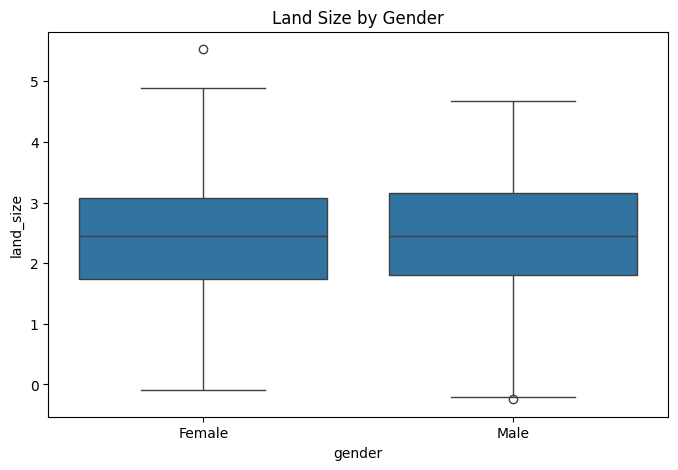

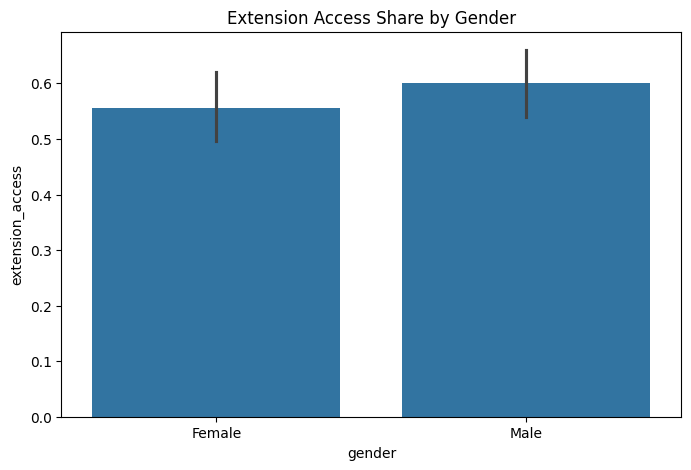

In [4]:
# Visualizing Gender Gaps
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='land_size', data=data)
plt.title('Land Size by Gender')
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='extension_access', data=data)
plt.title('Extension Access Share by Gender')
plt.show()

In [6]:
#Simple Regression Analysis
import statsmodels.api as sm

ndata = data.copy()
ndata['gender_female'] = (ndata['gender']=='Female').astype(int)

X = ndata[['gender_female', 'land_size', 'extension_access', 'fertilizer_use']]
y = ndata['yield_kg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               yield_kg   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.292
Date:                Sat, 15 Nov 2025   Prob (F-statistic):              0.272
Time:                        12:10:30   Log-Likelihood:                -3553.6
No. Observations:                 500   AIC:                             7117.
Df Residuals:                     495   BIC:                             7138.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1045.0606     59.987  

In [7]:
summary = {
'female_land_gap': data.groupby('gender')['land_size'].mean(),
'female_extension_gap': data.groupby('gender')['extension_access'].mean(),
'yield_gap': data.groupby('gender')['yield_kg'].mean()
}
summary

{'female_land_gap': gender
 Female    2.427259
 Male      2.457727
 Name: land_size, dtype: float64,
 'female_extension_gap': gender
 Female    0.556
 Male      0.600
 Name: extension_access, dtype: float64,
 'yield_gap': gender
 Female    1184.31718
 Male      1156.51960
 Name: yield_kg, dtype: float64}

In [8]:
results_path = '/content/gender_agriculture_results.csv'
data.to_csv(results_path, index=False)
print(f"Results saved to: {results_path}")

Results saved to: /content/gender_agriculture_results.csv
